Enter the number of edges:  5
Enter an edge in the format 'node1 node2':  2 1
Enter an edge in the format 'node1 node2':  3 5
Enter an edge in the format 'node1 node2':  0 4
Enter an edge in the format 'node1 node2':  1 4 
Enter an edge in the format 'node1 node2':  2 5
Enter the number of colors to be used for coloring the graph:  2


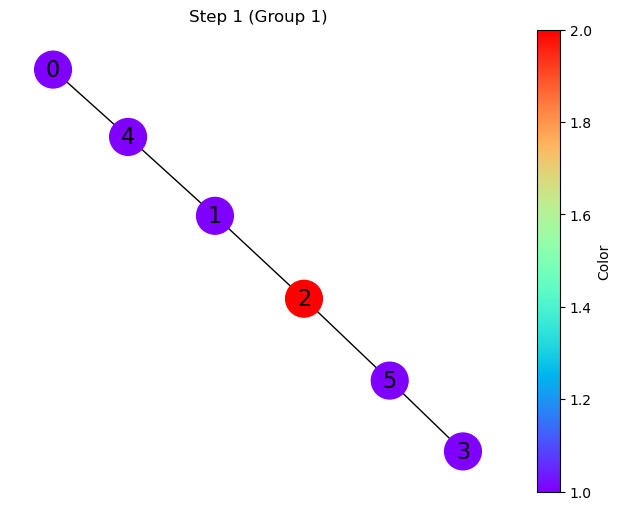

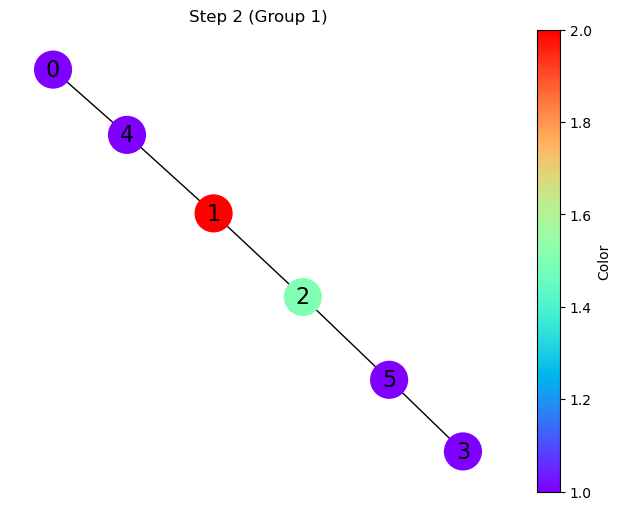

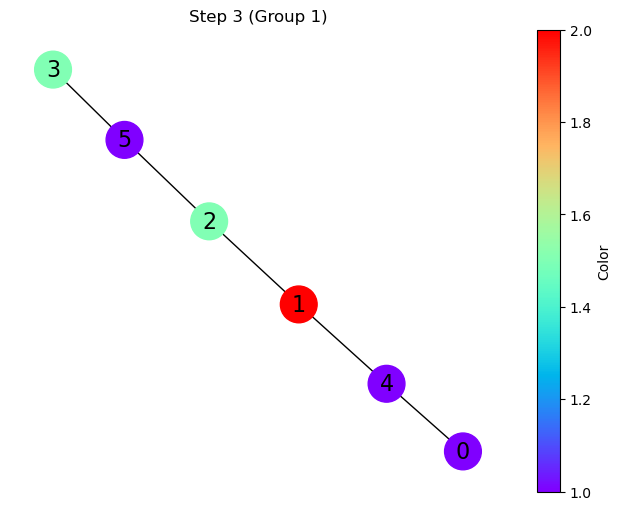

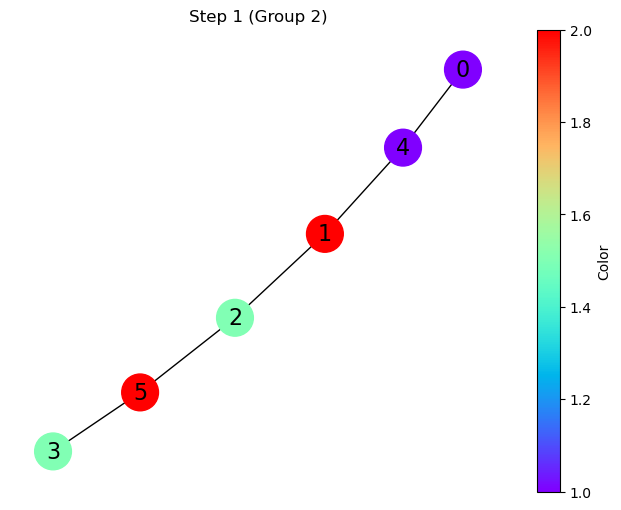

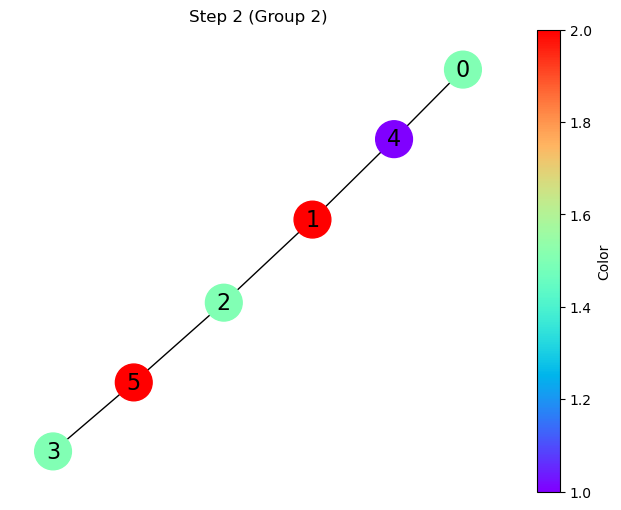

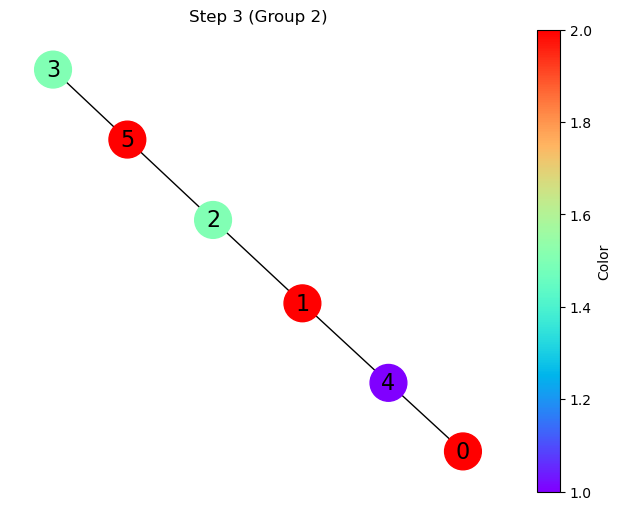

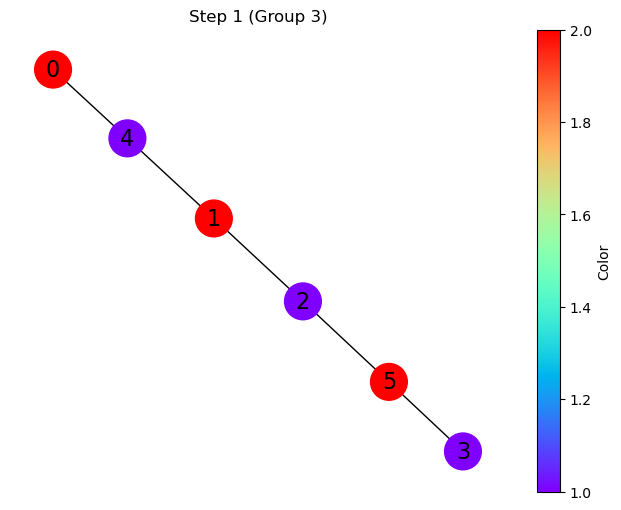

Found solution for Graph Coloring Problem:


In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

class GraphColoringBacktracking:
    def __init__(self, graph, num_colors):
        self.graph = graph
        self.num_colors = num_colors
        self.node_colors = {node: None for node in graph.nodes}
        self.step_counter = 1
        self.group_counter = 1

    def is_safe(self, node, color):
        for neighbor in self.graph.neighbors(node):
            if self.node_colors[neighbor] == color:
                return False
        return True

    def solve_graph_coloring_util(self, node_index):
        if node_index == len(self.graph.nodes):
            return True

        node = list(self.graph.nodes)[node_index]

        for color in range(1, self.num_colors + 1):
            if self.is_safe(node, color):
                self.node_colors[node] = color
                self.show_step_by_step_solution()
                if self.solve_graph_coloring_util(node_index + 1):
                    return True
                self.node_colors[node] = None

        return False

    def show_step_by_step_solution(self):
        self.visualize_graph()
        self.step_counter += 1
        if self.step_counter > 3:
            self.step_counter = 1
            self.group_counter += 1

    def visualize_graph(self):
        G = self.graph
        node_colors = [self.node_colors[node] if self.node_colors[node] is not None else 0 for node in G.nodes]

        fig, ax = plt.subplots(figsize=(8, 6))
        pos = nx.spring_layout(G)
        nx.draw(G, pos, node_color=node_colors, with_labels=True, cmap=plt.cm.rainbow, node_size=700, font_size=16, ax=ax)

        sm = plt.cm.ScalarMappable(cmap=plt.cm.rainbow, norm=plt.Normalize(vmin=1, vmax=self.num_colors))
        sm.set_array([])
        plt.colorbar(sm, ax=ax, label="Color")

        plt.title(f"Step {self.step_counter} (Group {self.group_counter})")
        plt.show()

    def solve_graph_coloring(self):
        if not self.solve_graph_coloring_util(0):
            print("Solution does not exist")
            return
        print(f"Found solution for Graph Coloring Problem:")

# Main code to take user input
if __name__ == "__main__":
   
    try:
        num_edges = int(input("Enter the number of edges: "))
        edges = []

      
        for _ in range(num_edges):
            edge = input("Enter an edge in the format 'node1 node2': ")
            u, v = map(int, edge.split())
            edges.append((u, v))

      
        graph = nx.Graph()
        graph.add_edges_from(edges)

        num_colors = int(input("Enter the number of colors to be used for coloring the graph: "))

        graph_coloring = GraphColoringBacktracking(graph, num_colors)

        
        graph_coloring.solve_graph_coloring()

    except ValueError:
        print("Invalid input! Please enter integers only.")
